In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('tvmarketing.csv')

In [3]:
df.columns

Index(['TV', 'Sales'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [5]:
df.shape

(200, 2)

In [6]:
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [7]:
df.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [9]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [11]:
import seaborn as sns

#To visulaise data
%matplotlib inline

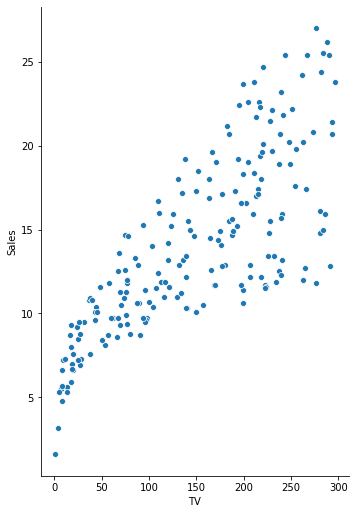

In [16]:
#Visulize the relationship between TV and Sales
sns.pairplot(df, x_vars='TV',y_vars='Sales', size=7, aspect=0.7,kind='scatter')

In [19]:
#Putting the feature varialble to X
x = df['TV']
x.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [20]:
y = df['Sales']
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

## Splits Data to Training and Testing sets

In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state=100)

In [49]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(140,)
(140,)
(60,)
(60,)


In [50]:
x_train = x_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]

In [51]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(140, 1)
(140,)
(60, 1)
(60,)


## Perform Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
#Print the intercept Bita1 and coefficients Bita2
print(lr.intercept_)
print(lr.coef_)

#Model is: y = b1+b2x
#b1= lr.intercept_
#b2=lr.coef_

6.989665857411679
[0.04649736]


## Prediction

In [60]:
y_pred = lr.predict(x_test)
type(y_pred)

numpy.ndarray

## Compute RMSE(Root Mean Square Error) and R^2 Valaue

Text(0, 0.5, 'Sales')

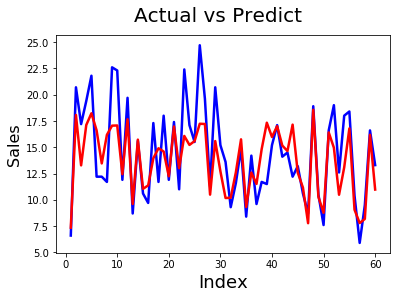

In [76]:
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c,y_pred, color ='red', linewidth=2.5, linestyle='-')
fig.suptitle('Actual vs Predict', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Sales', fontsize=16)

In [84]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_square = r2_score(y_test,y_pred)

print('Mean Squared Error: {}'.format(mse))
print('R square : {}'.format(r_square))

Mean Squared Error: 7.97579853285485
R square : 0.5942987267783302


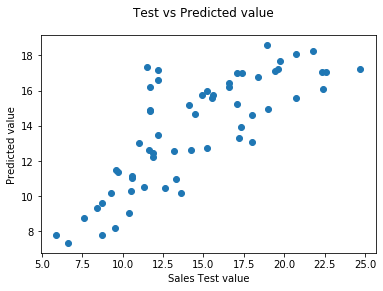

In [87]:
plt.scatter(y_test, y_pred)
plt.suptitle('Test vs Predicted value')
plt.xlabel('Sales Test value')
plt.ylabel('Predicted value')
plt.show()